# Solar data visualization

In [ ]:
#| default_exp sol_viz

In [ ]:
#| export
from sunpy.map import Map
import matplotlib.pyplot as plt

In [ ]:
#| export
class SolarDataViz:
    def __init__(self):
        pass

    def draw_hmi(self, hmi_path):
        hmi_map = Map(hmi_path)
        hmi_map.peek()
        self.ref_wcs = hmi_map.wcs

    def draw_aia(self, aia_path, wavelength):
        aia_map = Map(aia_path)
        aia_map.peek()
        obstime = aia_map.observer_coordinate.obstime
        obstime.format = 'iso'
        aia_repro_map = aia_map.reproject_to(self.ref_wcs)

        fig = plt.figure()
        ax = fig.add_subplot(projection=aia_repro_map)
        aia_repro_map.plot(axes=ax)
        plt.colorbar()
        plt.title(f"AIA {wavelength} Å {obstime.value}")
        plt.show()

In [ ]:
import os

In [ ]:
obsdata = '/nas/obsdata/sdo_AR/'

In [ ]:
plotter = SolarDataViz()

In [ ]:
hmi_path = os.path.join(obsdata, 'NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170904_000000_TAI.Br.fits')

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


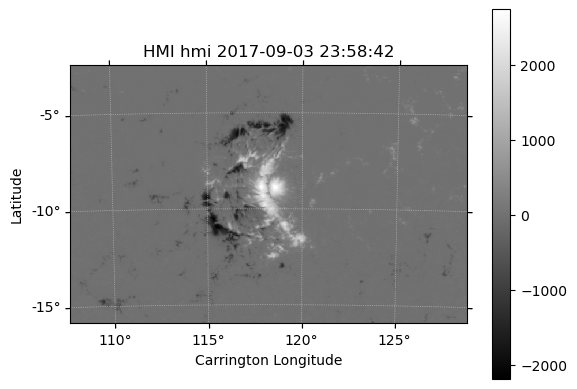

In [ ]:
plotter.draw_hmi(hmi_path)

In [ ]:
aia94_path = os.path.join(obsdata, 'NOAA12673_HARP7115/aia/94/aia.lev1_euv_12s.2017-09-04T000001Z.94.image_lev1.fits')

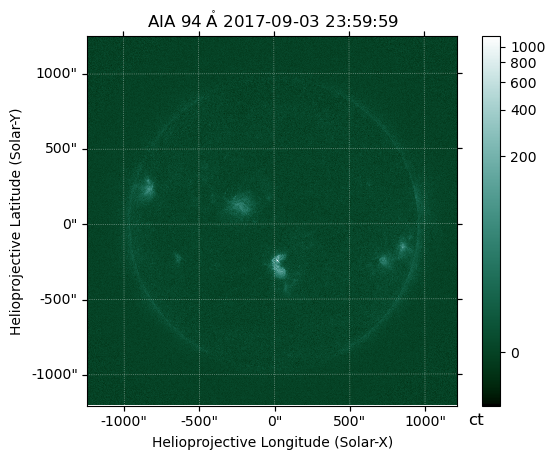

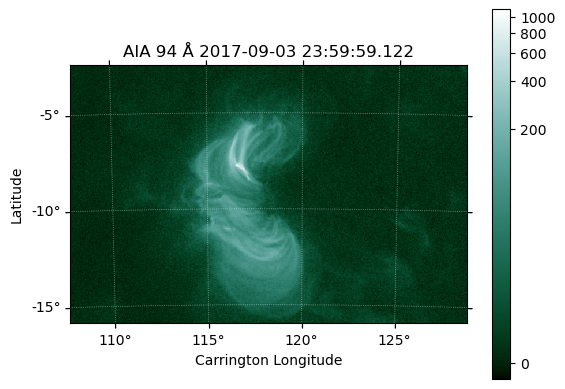

In [ ]:
plotter.draw_aia(aia94_path, wavelength='94')